In [1]:
#importing packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from apyori import apriori
import itertools


In [2]:
#reading csv file
data = pd.read_csv('groceries.csv', header=None, sep='\n')
data =data[0].str.split(',', expand=True)
data.shape


(9835, 32)

In [3]:
#top 20-sold outs from groceries.csv
all_items = set()#set of all items
with open("groceries.csv") as f:
    reader = csv.reader(f, delimiter=",")
    for i, line in enumerate(reader):
        all_items.update(line)



In [4]:
#Now, we count if a particular item appears in the a particular row and update it in a list format.
counting = list()
with open("groceries.csv") as f:
    reader = csv.reader(f, delimiter=",")
    for i, line in enumerate(reader):
        row = {item:0 for item in all_items}
        row.update({item:1 for item in line})
        counting.append(row)

In [5]:
#Next, convert the list in to Pandas DataFrame so that wecan do pandas operations.
groceries = pd.DataFrame(counting)
groceries.head()
# 0 represents that the item is not present in a particular row/ item order list.


,margarine,detergent,tidbits,finished products,whole milk,soft cheese,soap,white bread,flower soil/fertilizer,canned vegetables,...,rum,salad dressing,liqueur,canned fish,ham,brandy,cream,Instant food products,pip fruit,meat spreads
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#how much of the total sales they account for
tot_item_count = sum(groceries.sum())
  
item_sum = groceries.sum().sort_values(ascending = False).reset_index().head(n=20)
item_sum.rename(columns={item_sum.columns[0]:'Item_name',item_sum.columns[1]:'Item_count'}, inplace=True)

item_sum['Item_percent'] = item_sum['Item_count']/tot_item_count
item_sum['Tot_percent'] = item_sum.Item_percent.cumsum()
item_sum.head(20) # List of top 20 items with percents

,Item_name,Item_count,Item_percent,Tot_percent
0,whole milk,2513,0.057947,0.057947
1,other vegetables,1903,0.043881,0.101829
2,rolls/buns,1809,0.041714,0.143542
3,soda,1715,0.039546,0.183089
4,yogurt,1372,0.031637,0.214725
5,bottled water,1087,0.025065,0.239791
6,root vegetables,1072,0.024719,0.264510
7,tropical fruit,1032,0.023797,0.288307
8,shopping bags,969,0.022344,0.310651
9,sausage,924,0.021307,0.331957


In [7]:
#Create a function prune_dataset
def prune_dataset(olddf, len_transaction, tot_sales_percent):
    # Delete the last column tot_items if present
    if 'tot_items' in olddf.columns:
        del(olddf['tot_items'])
    #Finding the item_count for each item and total number of items.
    #This is the same code as in step 3    
    Item_count = olddf.sum().sort_values(ascending = False).reset_index()
    tot_items = sum(olddf.sum().sort_values(ascending = False))
    Item_count.rename(columns={Item_count.columns[0]:'Item_name',Item_count.columns[1]:'Item_count'}, inplace=True)
    
    # Code from Step 3 to find Item Percentage and Total Percentage.
    Item_count['Item_percent'] = Item_count['Item_count']/tot_items
    Item_count['Tot_percent'] = Item_count.Item_percent.cumsum()
    
    # Taking items that fit the condition/ minimum threshold for total sales percentage.
    selected_items = list(Item_count[Item_count.Tot_percent < tot_sales_percent].Item_name)
    olddf['tot_items'] = olddf[selected_items].sum(axis = 1)

    # Taking items that fit the condition/ minimum threshold for length of transaction or number of items in a row.
    olddf = olddf[olddf.tot_items >= len_transaction]
    del(olddf['tot_items'])
     #Return pruned dataframe.
    return olddf[selected_items], Item_count[Item_count.Tot_percent < tot_sales_percent]



In [8]:
#pruned dataset1
pruneddf, Item_count = prune_dataset(groceries,4,0.4)
print(pruneddf.shape)
print(list(pruneddf.columns))


(1267, 13)
['whole milk', 'other vegetables', 'rolls/buns', 'soda', 'yogurt', 'bottled water', 'root vegetables', 'tropical fruit', 'shopping bags', 'sausage', 'pastry', 'citrus fruit', 'bottled beer']


In [9]:
#pruned dataset2
pruneddf, Item_count = prune_dataset(groceries,4,0.5)
print(pruneddf.shape)
print(list(pruneddf.columns))


(1998, 19)
['whole milk', 'other vegetables', 'rolls/buns', 'soda', 'yogurt', 'bottled water', 'root vegetables', 'tropical fruit', 'shopping bags', 'sausage', 'pastry', 'citrus fruit', 'bottled beer', 'newspapers', 'canned beer', 'pip fruit', 'fruit/vegetable juice', 'whipped/sour cream', 'brown bread']


In [10]:
#pruned dataset3
pruneddf, Item_count = prune_dataset(groceries,2,0.5)
print(pruneddf.shape)
print(list(pruneddf.columns))


(5391, 19)
['whole milk', 'other vegetables', 'rolls/buns', 'soda', 'yogurt', 'bottled water', 'root vegetables', 'tropical fruit', 'shopping bags', 'sausage', 'pastry', 'citrus fruit', 'bottled beer', 'newspapers', 'canned beer', 'pip fruit', 'fruit/vegetable juice', 'whipped/sour cream', 'brown bread']


In [11]:
y = list(pruneddf.columns)
for s in y:
    #s is column name
    pruneddf.loc[(pruneddf[s] == 1),s]=s

In [12]:
#Removing Zero's
lol = pruneddf.values.tolist() 
for a in lol:
    while (0 in a):
        a.remove(0)

In [13]:
#Making a new pruned dataset csv file
with open("pruned.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(lol)

In [14]:
#here we can apply Apriori Code
import csv
import itertools
#Delete Files prunedRules and PrunedFItems otherwise new data will be appended.
Groceries = open('pruned.csv', 'r')

In [15]:
#Minimum Support Count
min_support = 0.04
Rules = "prunedRules.txt"
freqItemsets = "prunedFItems.txt"
#Mininum Confidence
min_confidence = 0.30

In [16]:
# Finding all Frequent 1-Item sets
def OneItemSets():
    #Get all 1-itemsets in the list items and their counts in the dictionary counts
    DataCaptured = csv.reader(Groceries, delimiter=',')
    data = list(DataCaptured)
    for e in data:
        e = sorted(e)
    count = {}
    for items in data:
        for item in items:
            if item not in count:
                count[(item)] = 1
            else:
                count[(item)] = count[(item)] + 1

    count2 = {k: v for k, v in count.items() if v >= min_support*9835}

    return count2, data

In [17]:
#Ck is a superset of Lk. It is a part of Prune Step. its members may or may not be frequent, but all of the frequent k-itemsets are included in Ck.
# Generated by joing two Lk
def generateCk(Lk_1, flag, data):
    Ck = []
    if flag == 1:
        flag = 0
        for item1 in Lk_1:
            for item2 in Lk_1:
                if item2 > item1:
                    Ck.append((item1, item2))
        print("C2: ", Ck[1:3])
        print("length : ", len(Ck))
        print()

    else:
        for item in Lk_1:
            k = len(item)
        for item1 in Lk_1:
            for item2 in Lk_1:
                if (item1[:-1] == item2[:-1]) and (item1[-1] != item2[-1]):
                    if item1[-1] > item2[-1]:
                        Ck.append(item2 + (item1[-1],))
                    else:
                        Ck.append(item1 + (item2[-1],))
        print("C" + str(k+1) + ": ", Ck[1:3])
        print("Length : ", len(Ck))
        print()
    L = generateLk(set(Ck), data)
    return L, flag

In [18]:
#If item in Ck belongs to a transaction, it makes it into list Ct Then Ct is thresholded to form L
# For K frequent Itemsets
def generateLk(Ck, data):
    
    count = {}
    for itemset in Ck:
        #print(itemset)
        for transaction in data:
            if all(e in transaction for e in itemset):
                if itemset not in count:
                    count[itemset] = 1
                else:
                    count[itemset] = count[itemset] + 1

    print("Ct Length : ", len(count))
    print()

    count2 = {k: v for k, v in count.items() if v >= min_support*9835}
    print("L Length : ", len(count2))
    print()
    return count2

In [19]:
#  Generates association rules from the frequent itemsets
def rulegenerator(fitems):
    counter = 0
    for itemset in fitems.keys():
        if isinstance(itemset, str):
            continue
        length = len(itemset)

        union_support = fitems[tuple(itemset)]
        for i in range(1, length):

            lefts = map(list, itertools.combinations(itemset, i))
            for left in lefts:
                if len(left) == 1:
                    if ''.join(left) in fitems:
                        leftcount = fitems[''.join(left)]
                        conf = union_support / leftcount
                else:
                    if tuple(left) in fitems:
                        leftcount = fitems[tuple(left)]
                        conf = union_support / leftcount
                if conf >= min_confidence:
                    fo = open(Rules, "a+")
                    right = list(itemset[:])
                    for e in left:
                        right.remove(e)
                    fo.write(str(left) + ' (' + str(leftcount) + ')' + ' -> ' + str(right) + ' (' + str(fitems[''.join(right)]) + ')' + ' [' + str(conf) + ']' + '\n')
                    print(str(left) + ' -> ' + str(right) + ' (' + str(conf) + ')')
                    counter = counter + 1
                    #Greater than 1???
                    fo.close()
    print(counter, "rules generated")

In [20]:
def plotitemfreq(L):
    aux = [(L[key], key) for key in L]
    aux.sort()
    aux.reverse()
    z = aux[0:20]
    print(z)
    df = pd.DataFrame(z, columns = ['Count', 'Word'])
    df['Count']=pd.to_numeric(df['Count'])
    print(df.info())
    df.plot.bar(x='Word', y='Count')

In [21]:
def apriori():
    L, data = OneItemSets()
    flag = 1
    FreqItems = dict(L)
    while(len(L) != 0):
        fo = open(freqItemsets, "a+")
        for k, v in L.items():
           
            fo.write(str(k) + ' >>> ' + str(v) + '\n\n')
        fo.close()
        plotitemfreq(L)

        L, flag = generateCk(L, flag, data)
        FreqItems.update(L)
    rulegenerator(FreqItems)




[(2172, 'whole milk'), (1691, 'other vegetables'), (1524, 'rolls/buns'), (1366, 'soda'), (1232, 'yogurt'), (988, 'root vegetables'), (952, 'tropical fruit'), (944, 'bottled water'), (844, 'sausage'), (839, 'shopping bags'), (770, 'pastry'), (744, 'citrus fruit'), (677, 'pip fruit'), (674, 'newspapers'), (643, 'fruit/vegetable juice'), (632, 'whipped/sour cream'), (575, 'bottled beer'), (570, 'brown bread'), (429, 'canned beer')]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Count   19 non-null     int64 
 1   Word    19 non-null     object
dtypes: int64(1), object(1)
memory usage: 432.0+ bytes
None
C2:  [('tropical fruit', 'whole milk'), ('tropical fruit', 'whipped/sour cream')]
length :  171

Ct Length :  171

L Length :  9

[(736, ('other vegetables', 'whole milk')), (557, ('rolls/buns', 'whole milk')), (551, ('whole milk', 'yogurt')), (481, ('root vege

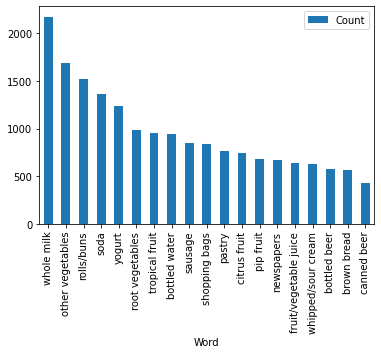

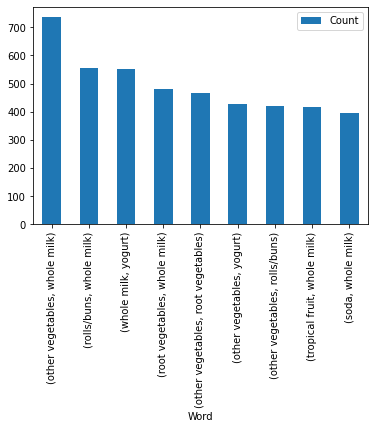

In [22]:
if __name__ == '__main__':
    apriori()